# 3. Linear Classifiers in Python

### 1. Applying logistic regression and SVM

### Model Selection

In [50]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import numpy as np

In [34]:
digits = load_digits()

In [35]:
X = digits.data
y = digits.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=40
)

Let's see how changing $k$ changes test accuracy for the digits dataset:

In [58]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [60]:
for k in [1, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'[{k} neighbor(s)] accuracy: {knn.score(X_test, y_test)}')

[1 neighbor(s)] accuracy: 0.9822222222222222
[5 neighbor(s)] accuracy: 0.9755555555555555


We see the model with only 1 neighbor gives the highest test accuracy.

### Overfitting

If we get a training accuracy of 95%, and a testing accuracy of 50%, it looks like overfitting!

### Running LogisticRegression and SVC

Next, let's see how LogisticRegression and SVC perform:

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
0.9755555555555555


/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9970304380103935
0.9911111111111112


Here we see SVC performs better across training and testing sets compared to LogisticRegression.

### Sentiment analysis for movie reviews

(Due to DataCamp making it difficult to download datasets and view code used behind the scenes, here is the code and output from running in their online terminal)

```python
lr = LogisticRegression()
lr.fit(X, y)
```

```python
# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0, 1])
```

```python
# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0, 1])
```

```
<script.py> output:
    Review: LOVED IT! This movie was amazing. Top 10 this year.
    Probability of positive review: 0.8111514459711535
    Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
    Probability of positive review: 0.5902983081147027
```

The second probability should be lower, but the word 'good' confuses the model slightly because it's a positive word.

### Visualising decision boundaries

In [107]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [108]:
wine = load_wine()

In [181]:
data_len = 130

In [182]:
X = wine.data[:data_len, 0:2]
y = wine.target[:data_len]

In [183]:
X.shape, y.shape

((130, 2), (130,))

In [184]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [185]:
from sklearn.svm import LinearSVC

In [186]:
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

In [187]:
for c in classifiers:
    c.fit(X, y)

/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [188]:
def plot_4_classifiers(X, y, clfs):
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [189]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters:
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


In [190]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters:
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns:
        xx, yy : ndarray
    """
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
    return xx, yy

In [197]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
    
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)

    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
                   
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
                   
    if show:        
        plt.show()
    else:
        return ax

/var/folders/qj/n9btg2fd0h16sf_b0274f1p00000gn/T/ipykernel_96694/2949910148.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
/var/folders/qj/n9btg2fd0h16sf_b0274f1p00000gn/T/ipykernel_96694/2949910148.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/qj/n9btg2fd0h16sf_b0274f1p00000gn/T/ipykernel_96694/2949910148.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==label

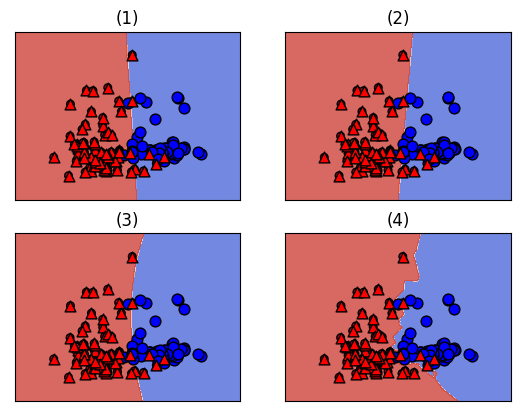

In [198]:
# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

Here we see logistic regression and linear SVM are linear classifiers whereas KNN is not. The default SVM is also non-linear, but this is hard to see in the plot because it performs poorly with default hyperparameters. With better hyperparameters, it performs well.